# SWMAL Exercise


## Convolutional Neural Networks (CNNs)


Excercise 9 from [HOML], p.496 2nd./p.535 3rd. (slighty modified):

__"9. Build an CNN via the Keras API and try to achieve the highest possible accuracy on MNIST."__

For the journal:

* write an introduction to CNNs (what are CNNs, what is a convolution layer, etc..),
* document your experiments towards the end-goal of reaching 'a high accuracy' (what did you try, what work/did not work),
* document how you use '_generalization_' in your setup (us of simple hold-out/train-test split or k-fold, or etc..),
* produce some sort of '_learning-curve_' that illustrates the drop in cost- or increase in score-function with respect to, say training iteration (for inspiration see fig 4.20, 10-12 or 10.17 in [HOML]),
* document the final CNN setup (layers etc., perhaps as a graph/drawing),
* discus on your iterations towards the end-goal and other findings you had,
* and, as always, write a conclusion.

If you use a code template from slides, HOML or the internet, then remember to add a reference to the original work in you journal.

In [1]:
# TODO: CNN implemetation via Keras..
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_openml
import keras
from keras import layers
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt

##loading the mnist dataset from O[1]
def MNIST_GetDataSet():
  mnist = fetch_openml('mnist_784',version=1,
                       return_X_y=True, as_frame=False)
  return mnist

X,y = MNIST_GetDataSet()
X = X.reshape((-1, 28, 28, 1)).astype('float32') / 255  # Reshape and normalize
y = to_categorical(y)  # One-hot encode labels

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state = 42 )
print("done")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


done


#Building Models

In [2]:
#Build the CNN
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

fitting = model.fit(X_train, y_train, epochs=10, batch_size= 64,validation_split = 0.2)
test_loss, test_acc = model.evaluate(X_test,y_test)
print(f"Test Accuracy : {test_acc}")

# plt.plot(fitting.history['accuracy'], label='Training Accuracy')
# plt.plot(fitting.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')
# plt.show()

Epoch 1/10
700/700 [==============================] - 23s 32ms/step - loss: 0.3304 - accuracy: 0.9057 - val_loss: 0.1517 - val_accuracy: 0.9564
Epoch 2/10
700/700 [==============================] - 20s 29ms/step - loss: 0.1145 - accuracy: 0.9683 - val_loss: 0.0959 - val_accuracy: 0.9713
Epoch 3/10
700/700 [==============================] - 18s 26ms/step - loss: 0.0766 - accuracy: 0.9781 - val_loss: 0.0785 - val_accuracy: 0.9765
Epoch 4/10
700/700 [==============================] - 20s 29ms/step - loss: 0.0614 - accuracy: 0.9824 - val_loss: 0.0731 - val_accuracy: 0.9771
Epoch 5/10
700/700 [==============================] - 19s 28ms/step - loss: 0.0527 - accuracy: 0.9845 - val_loss: 0.0655 - val_accuracy: 0.9793
Epoch 6/10
700/700 [==============================] - 18s 26ms/step - loss: 0.0451 - accuracy: 0.9864 - val_loss: 0.0628 - val_accuracy: 0.9808
Epoch 7/10
700/700 [==============================] - 18s 26ms/step - loss: 0.0409 - accuracy: 0.9881 - val_loss: 0.0686 - val_accuracy:

In [3]:
model1 = keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
fitting1 = model1.fit(X_train, y_train, epochs=10, batch_size= 64,validation_split = 0.2)
test_loss, test_acc = model1.evaluate(X_test,y_test)
print(f"Test Accuracy : {test_acc}")

# plt.plot(fitting1.history['accuracy'], label='Training Accuracy')
# plt.plot(fitting1.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')
# plt.show()

Epoch 1/10
700/700 [==============================] - 44s 61ms/step - loss: 0.3481 - accuracy: 0.8918 - val_loss: 0.0696 - val_accuracy: 0.9781
Epoch 2/10
700/700 [==============================] - 41s 59ms/step - loss: 0.1084 - accuracy: 0.9684 - val_loss: 0.0495 - val_accuracy: 0.9837
Epoch 3/10
700/700 [==============================] - 43s 61ms/step - loss: 0.0773 - accuracy: 0.9786 - val_loss: 0.0477 - val_accuracy: 0.9854
Epoch 4/10
700/700 [==============================] - 43s 61ms/step - loss: 0.0639 - accuracy: 0.9822 - val_loss: 0.0337 - val_accuracy: 0.9899
Epoch 5/10
700/700 [==============================] - 42s 60ms/step - loss: 0.0485 - accuracy: 0.9858 - val_loss: 0.0454 - val_accuracy: 0.9865
Epoch 6/10
700/700 [==============================] - 43s 61ms/step - loss: 0.0444 - accuracy: 0.9872 - val_loss: 0.0381 - val_accuracy: 0.9900
Epoch 7/10
700/700 [==============================] - 41s 59ms/step - loss: 0.0389 - accuracy: 0.9887 - val_loss: 0.0362 - val_accuracy:

In [4]:
model2 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')

])

model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
fitting2 = model2.fit(X_train, y_train, epochs=10, batch_size= 64,validation_split = 0.2)
test_loss, test_acc = model2.evaluate(X_test,y_test)
print(f"Test Accuracy : {test_acc}")

# plt.plot(fitting2.history['accuracy'], label='Training Accuracy')
# plt.plot(fitting2.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')
# plt.show()

Epoch 1/10
700/700 [==============================] - 206s 293ms/step - loss: 0.1483 - accuracy: 0.9529 - val_loss: 0.0454 - val_accuracy: 0.9859
Epoch 2/10
700/700 [==============================] - 212s 303ms/step - loss: 0.0434 - accuracy: 0.9866 - val_loss: 0.0319 - val_accuracy: 0.9903
Epoch 3/10
700/700 [==============================] - 217s 310ms/step - loss: 0.0290 - accuracy: 0.9907 - val_loss: 0.0277 - val_accuracy: 0.9912
Epoch 4/10
700/700 [==============================] - 209s 299ms/step - loss: 0.0237 - accuracy: 0.9929 - val_loss: 0.0281 - val_accuracy: 0.9920
Epoch 5/10
700/700 [==============================] - 212s 303ms/step - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.0360 - val_accuracy: 0.9907
Epoch 6/10
700/700 [==============================] - 213s 304ms/step - loss: 0.0157 - accuracy: 0.9951 - val_loss: 0.0368 - val_accuracy: 0.9902
Epoch 7/10
700/700 [==============================] - 204s 292ms/step - loss: 0.0125 - accuracy: 0.9960 - val_loss: 0.0315 -

# plot the learning curve for the models

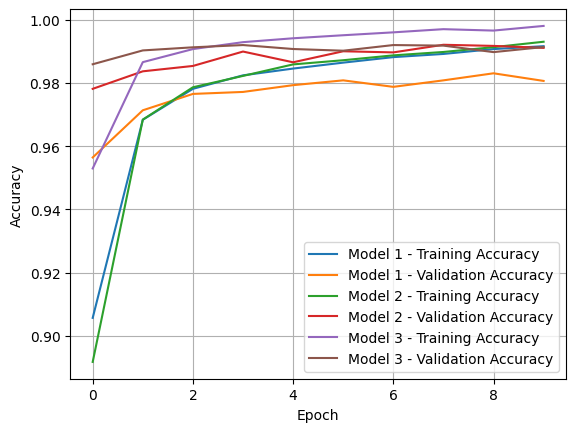

In [8]:
plt.plot(fitting.history['accuracy'], label='Model 1 - Training Accuracy')
plt.plot(fitting.history['val_accuracy'], label='Model 1 - Validation Accuracy')
plt.plot(fitting1.history['accuracy'], label='Model 2 - Training Accuracy')
plt.plot(fitting1.history['val_accuracy'], label='Model 2 - Validation Accuracy')
plt.plot(fitting2.history['accuracy'], label='Model 3 - Training Accuracy')
plt.plot(fitting2.history['val_accuracy'], label='Model 3 - Validation Accuracy')

plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

#visualise the model strurcture

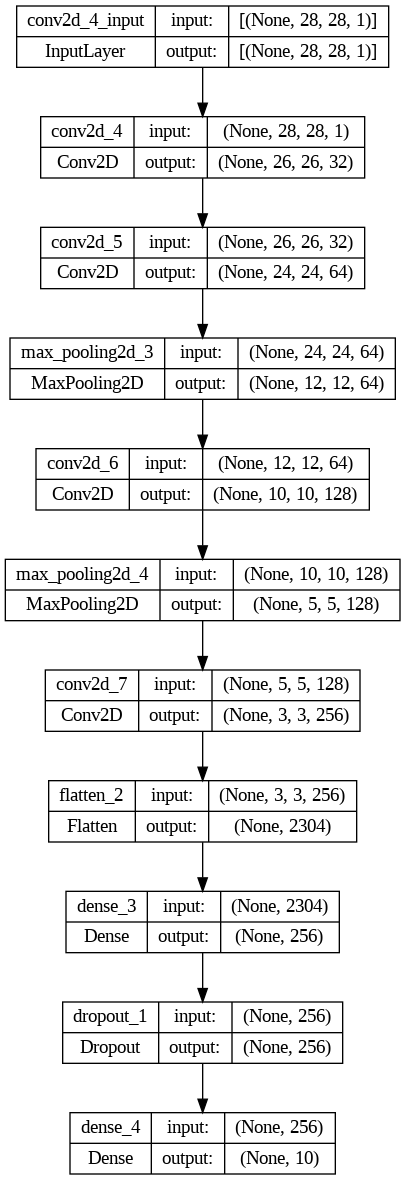

In [7]:
from keras.utils import plot_model

plot_model(model2, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


#visualise the filters


1/1 [==============================] - 0s 93ms/step


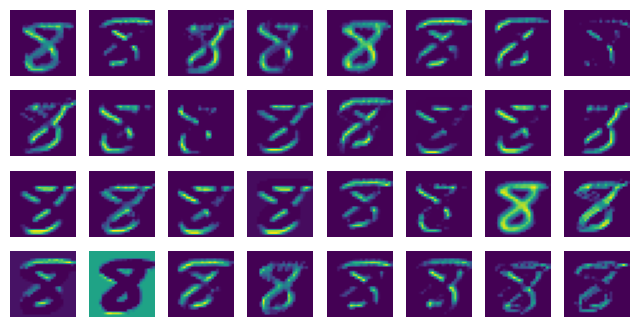

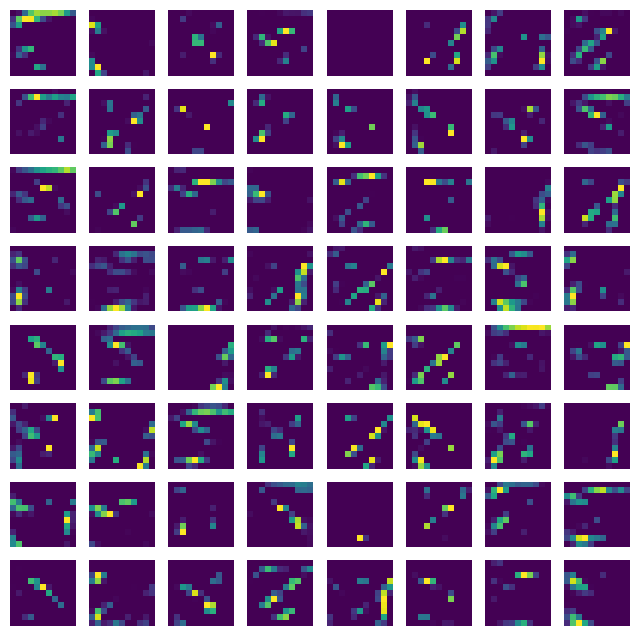

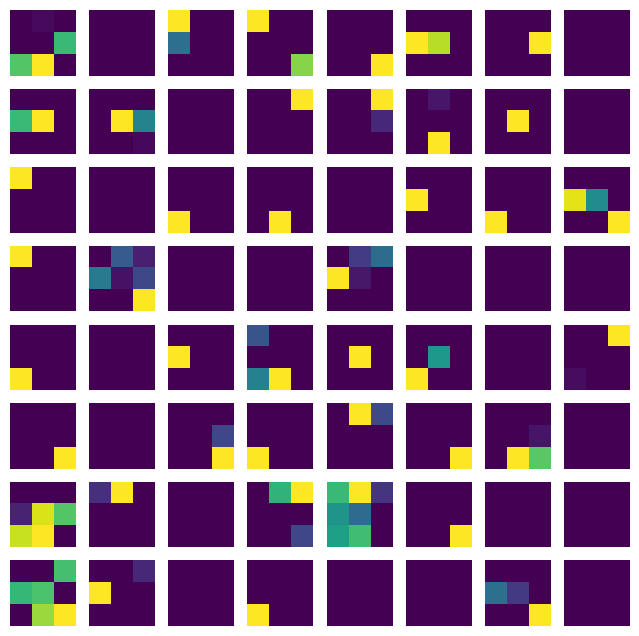

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model

# Assuming your model is named 'model'
layer_outputs = [layer.output for layer in model1.layers if 'conv2d' in layer.name]
activation_model = Model(inputs=model1.input, outputs=layer_outputs)

# Get an example image from the test set
example_image = X_test[0].reshape(1, 28, 28, 1)  # Adjust the index as needed

# Get the activations of the convolutional layers for the example image
activations = activation_model.predict(example_image)

# Visualize filters for each convolutional layer
for layer_activation in activations:
    # Get the number of filters in the layer
    num_filters = layer_activation.shape[-1]

    # Size of the grid for filter visualization
    n_cols = 8
    n_rows = num_filters // n_cols

    # Create a subplot for each filter
    plt.figure(figsize=(n_cols, n_rows))
    for i in range(num_filters):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(layer_activation[0, :, :, i], cmap='viridis')
        plt.axis('off')

    plt.show()


REVISIONS||
:- | :- |
2021-10-20| CEF, initial version, clone from [HOML].
2021-10-26| CEF, added learning curve item.
2022-01-25| CEF, update to SWMAL F22.
2023-03-08| CEF, updated page no to HOML 3rd. ed., updated to SWMAL F23.
2023-03-15| CEF, removed wording "from scratch", replaced with "via the Keras API" and added comment about references.

#weight distro


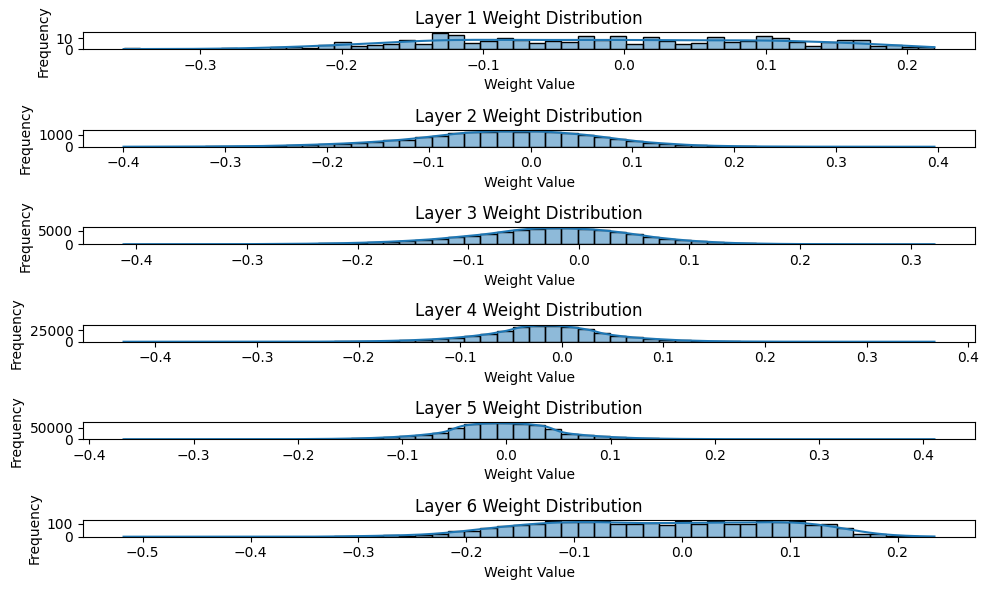

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Model

# Assuming your model is named 'model'
layer_weights = [layer.get_weights() for layer in model2.layers]

# Flatten the weights to visualize the distribution
flat_weights = [weight.flatten() for weights in layer_weights for weight in weights if len(weight.shape) > 1]

# Plot the distribution of weights
plt.figure(figsize=(10, 6))
for i, weights in enumerate(flat_weights):
    plt.subplot(len(flat_weights), 1, i + 1)
    sns.histplot(weights, bins=50, kde=True)
    plt.title(f'Layer {i + 1} Weight Distribution')
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

